# Дз № 18

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'


Сначала считаем данные

In [2]:
df = pd.read_csv('flight_delays.csv', sep=',')
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


## Задание 1
Визуализируем на круговой диаграмме долю всех задержек ко всем вылетам

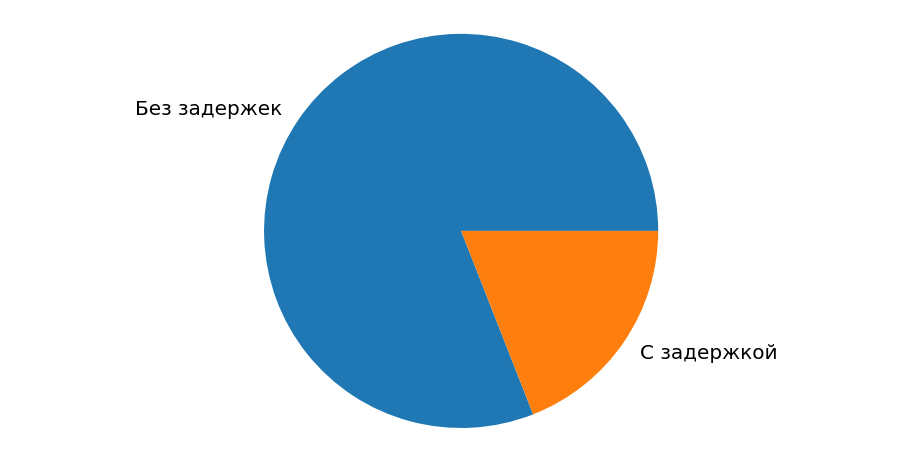

In [3]:
plt.figure(figsize=(8,4))
not_delayed = df[df['dep_delayed_15min']=='N'].count()[1]
delayed = df[df['dep_delayed_15min']=='Y'].count()[1]
plt.pie([not_delayed, delayed], labels = ['Без задержек', 'С задержкой']) 
plt.axis('equal')
plt.show()

## Задание 2
Покажем на столбчатой диаграмме зависимость количества задержек от длины пути, который предстоит пролететь самолёту

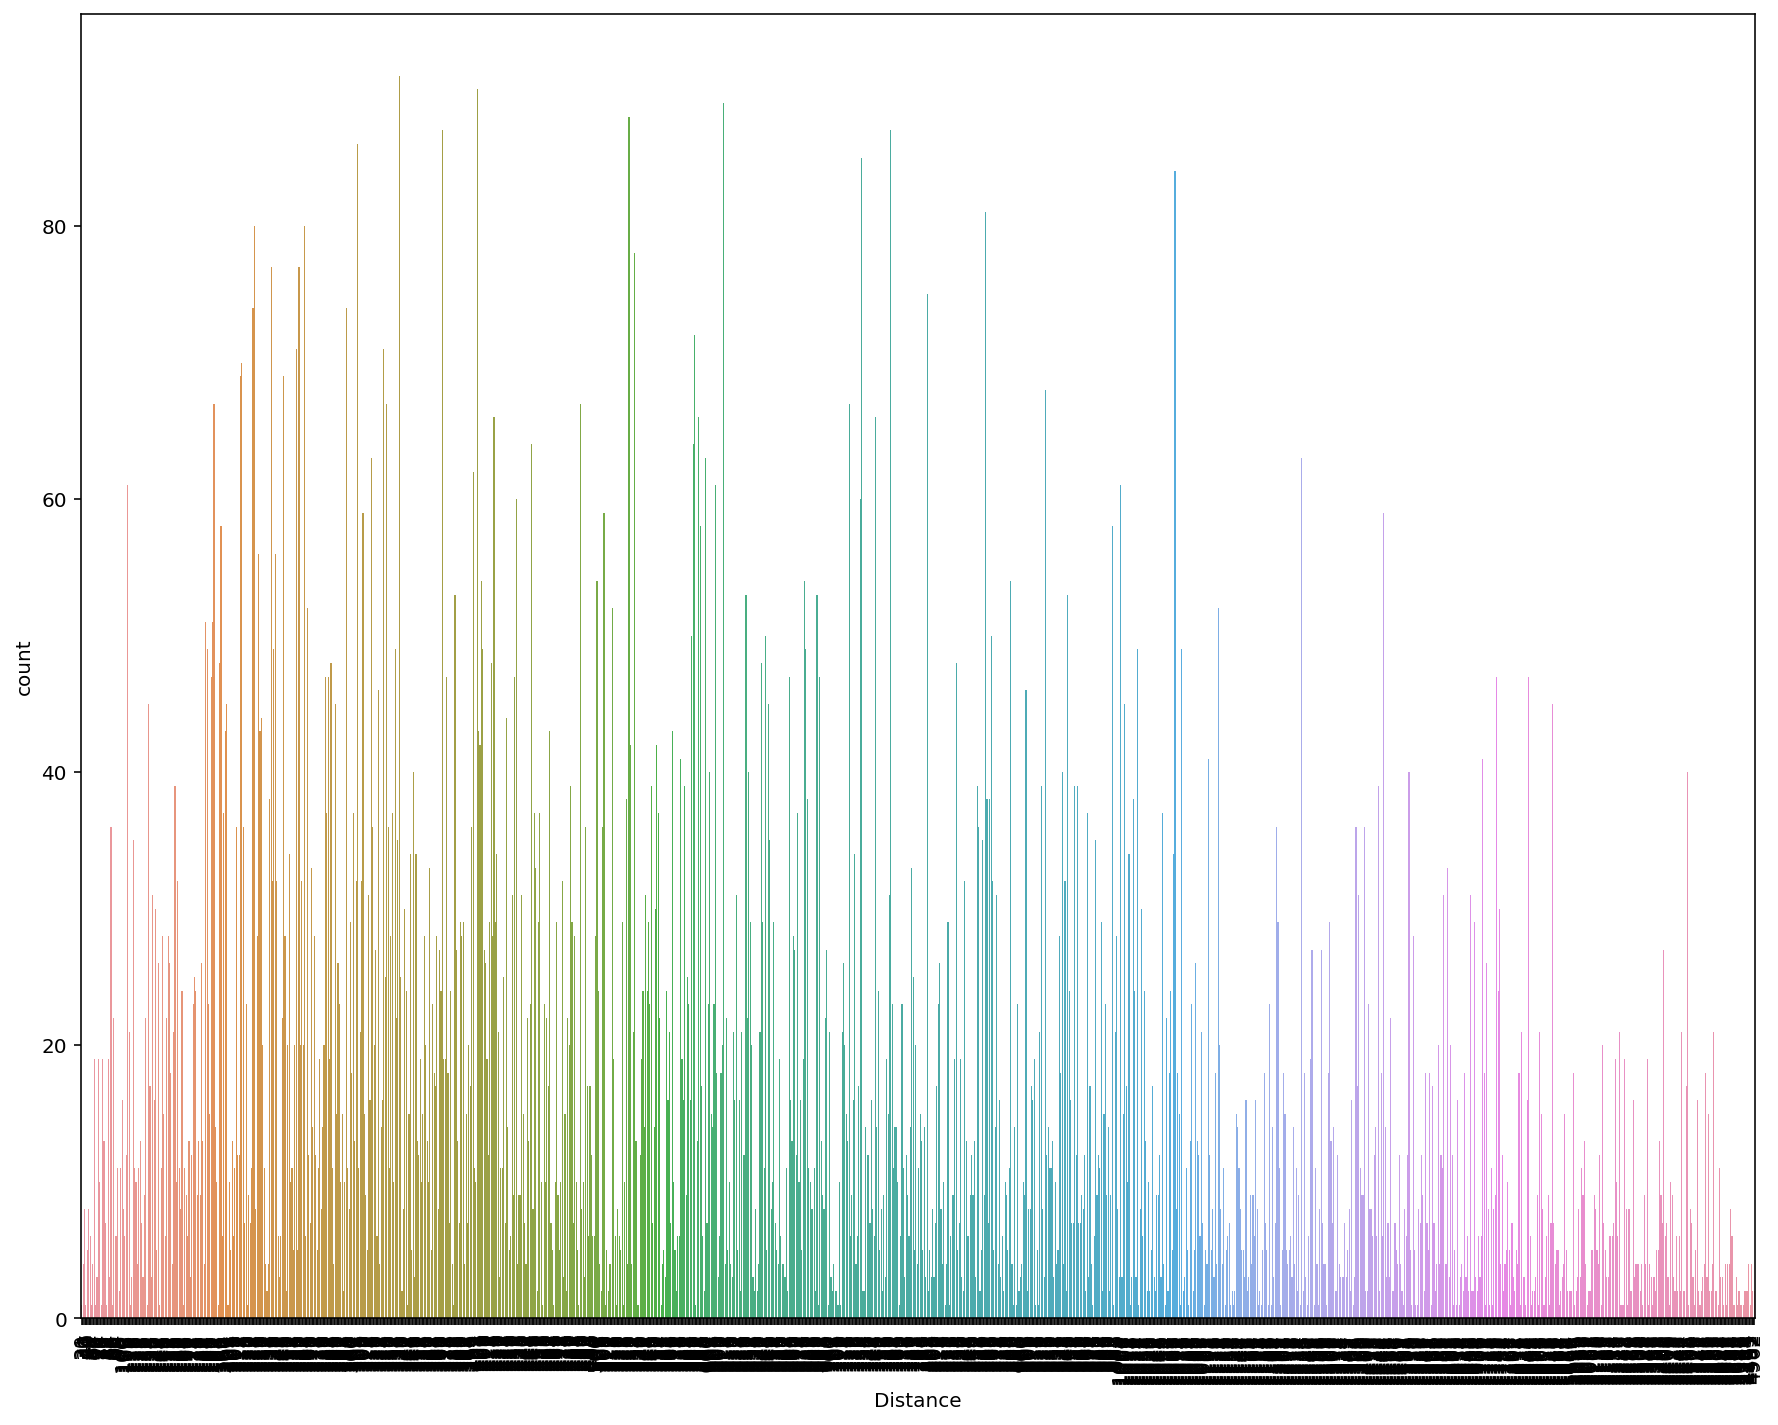

In [4]:
delayed = df[['Distance','dep_delayed_15min']]
delayed["dep_delayed_15min"]=(delayed['dep_delayed_15min']=='Y').astype('int')
plt.figure(figsize=(15,12))
sns.countplot(x='Distance', data=delayed[delayed['dep_delayed_15min']==1])
plt.xticks(rotation=90)
plt.show()

Не очень информативно, попробуем сделать красивее

In [5]:
delayed['Distance'].min(), delayed['Distance'].max()

(30, 4962)

разобьем на подгруппы:
+ менее 100 км
+ 100-499 км
+ 500-999 км
+ 1000-2500 км
+ более 2500 км

In [6]:
X = delayed['Distance']
cathegory=pd.Series(np.zeros(len(X)))
x1 = delayed.loc[np.where(X<100)]
x2 = delayed.loc[np.where((X>=100) & (X<500))]
x3 = delayed.loc[np.where((X>=500) & (X<1000))]
x4 = delayed.loc[np.where((X>=1000) & (X<25000))]
x5 = delayed.loc[np.where(X>=2500)]
(cathegory.loc[x1.index]) = 'Less 100 km'
(cathegory.loc[x2.index]) = '100 - 499 km'
(cathegory.loc[x3.index]) = '500 - 999 km'
(cathegory.loc[x4.index]) = '1000 - 2499 km'
(cathegory.loc[x5.index]) = 'More 2500 km'
delayed['cathegory']=cathegory
delayed.head()

,Distance,dep_delayed_15min,cathegory
0,732,0,500 - 999 km
1,834,0,500 - 999 km
2,416,0,100 - 499 km
3,872,0,500 - 999 km
4,423,1,100 - 499 km


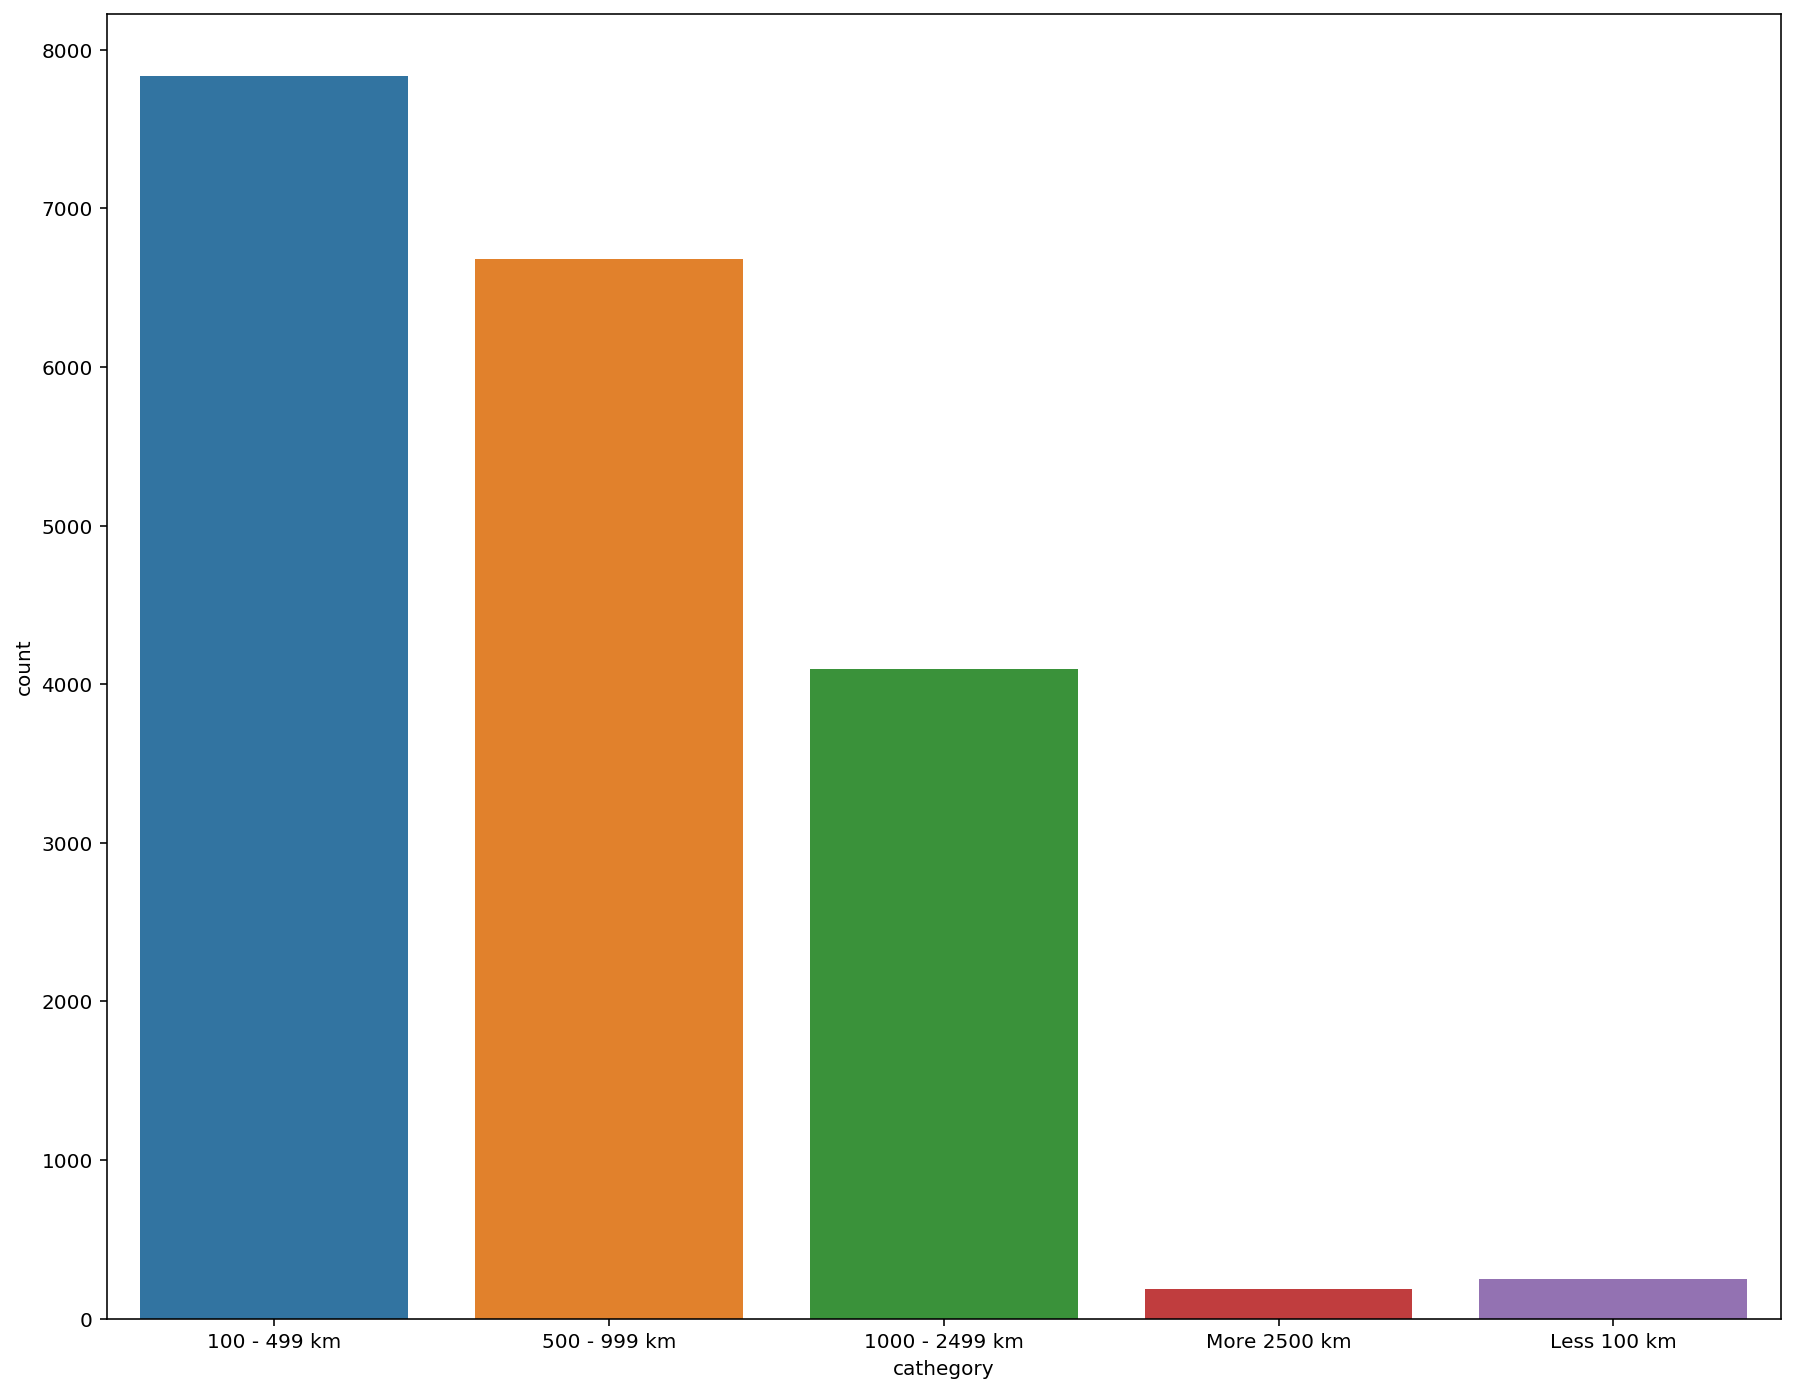

In [7]:
plt.figure(figsize=(15,12))
sns.countplot(x='cathegory', data=delayed[delayed['dep_delayed_15min']==1])
plt.show()

## Задание 3
Tоп 5 направлений, для которых чаще всего происходят задержки.

In [8]:
delayed1 = df[df['dep_delayed_15min']=='Y']
delayed1.groupby('Dest').dep_delayed_15min.count().sort_values( ascending=False).head(5)

Dest
ATL    1281
ORD    1072
DFW     656
EWR     584
LAX     525
Name: dep_delayed_15min, dtype: int64

## Задание 4
Времена года, когда чаще всего происходят задержки рейсов

In [9]:
X = df['Month']
season=pd.Series(np.zeros(len(X)))
x1 = df.loc[np.where((X=='c-6') | (X=='c-7') | (X=='c-8'))]
x2 = df.loc[np.where((X=='c-9') | (X=='c-10') | (X=='c-11'))]
x3 = df.loc[np.where((X=='c-1') | (X=='c-2') | (X=='c-12'))]
x4 = df.loc[np.where((X=='c-3') | (X=='c-4') | (X=='c-5'))]
(season.loc[x1.index]) = 'Summer'
(season.loc[x2.index]) = 'Autumn'
(season.loc[x3.index]) = 'Winter'
(season.loc[x4.index]) = 'Spring'
season
delayed['Season']=season
delayed.head()

,Distance,dep_delayed_15min,cathegory,Season
0,732,0,500 - 999 km,Summer
1,834,0,500 - 999 km,Spring
2,416,0,100 - 499 km,Autumn
3,872,0,500 - 999 km,Autumn
4,423,1,100 - 499 km,Autumn


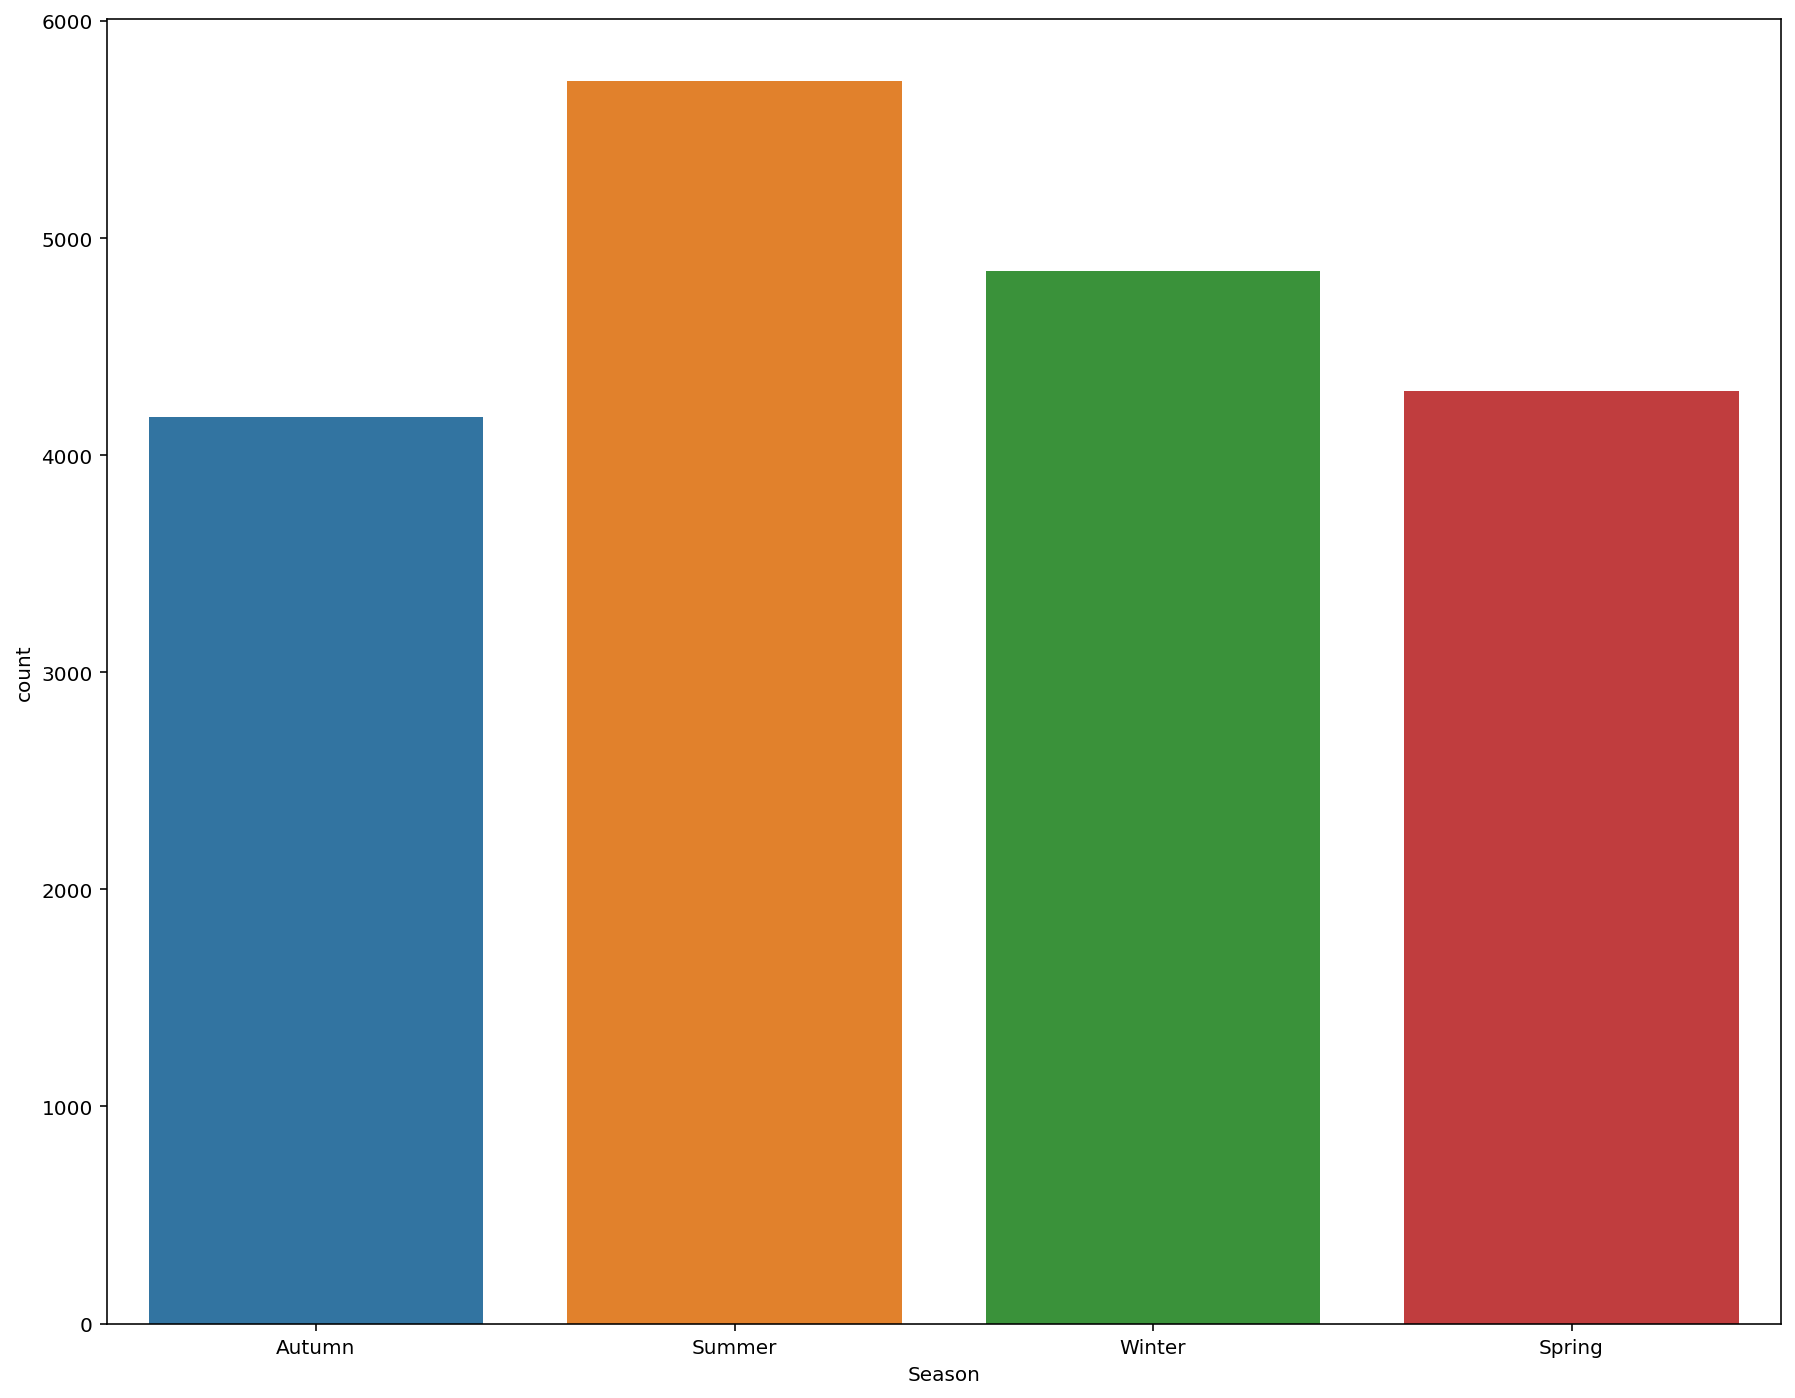

In [10]:
plt.figure(figsize=(15,12))
sns.countplot(x='Season', data=delayed[delayed['dep_delayed_15min']==1])
plt.show()

Интересно, что происходит летом, почему задержки, причем их много

## Задание 5
Топ 10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы.

Здесь будем считать долю задержанных рейсов ко всем рейсам.

In [11]:
delayed1 = df[df['dep_delayed_15min']=='Y']
total_delay = df.groupby('UniqueCarrier').dep_delayed_15min.count()
share_of_delay = delayed1.groupby('UniqueCarrier').dep_delayed_15min.count()/total_delay
share_of_delay.sort_values(ascending=True).head(10)

UniqueCarrier
HA    0.043307
AQ    0.076923
HP    0.142235
TZ    0.143498
F9    0.155070
DH    0.161491
US    0.167387
NW    0.167890
DL    0.168922
OO    0.172801
Name: dep_delayed_15min, dtype: float64

## Задание 6
Топ 5 направлений, для которых чаще всего происходят задержки. Здесь мы тоже посчитаем долю.

In [12]:
delayed1 = df[df['dep_delayed_15min']=='Y']
total_delay = df.groupby('Dest').dep_delayed_15min.count()
share_of_delay = delayed1.groupby('Dest').dep_delayed_15min.count()/total_delay
share_of_delay.sort_values(ascending=False).head(5)

Dest
TTN    1.000000
AKN    0.666667
BLI    0.666667
ILG    0.500000
WYS    0.500000
Name: dep_delayed_15min, dtype: float64

## Задание 7
Необычная зависимость. Ну тут без креатива... задержка от дня недели

In [13]:
delayed['Day_of_week'] = df['DayOfWeek']
delayed.head()

,Distance,dep_delayed_15min,cathegory,Season,Day_of_week
0,732,0,500 - 999 km,Summer,c-7
1,834,0,500 - 999 km,Spring,c-3
2,416,0,100 - 499 km,Autumn,c-5
3,872,0,500 - 999 km,Autumn,c-6
4,423,1,100 - 499 km,Autumn,c-6


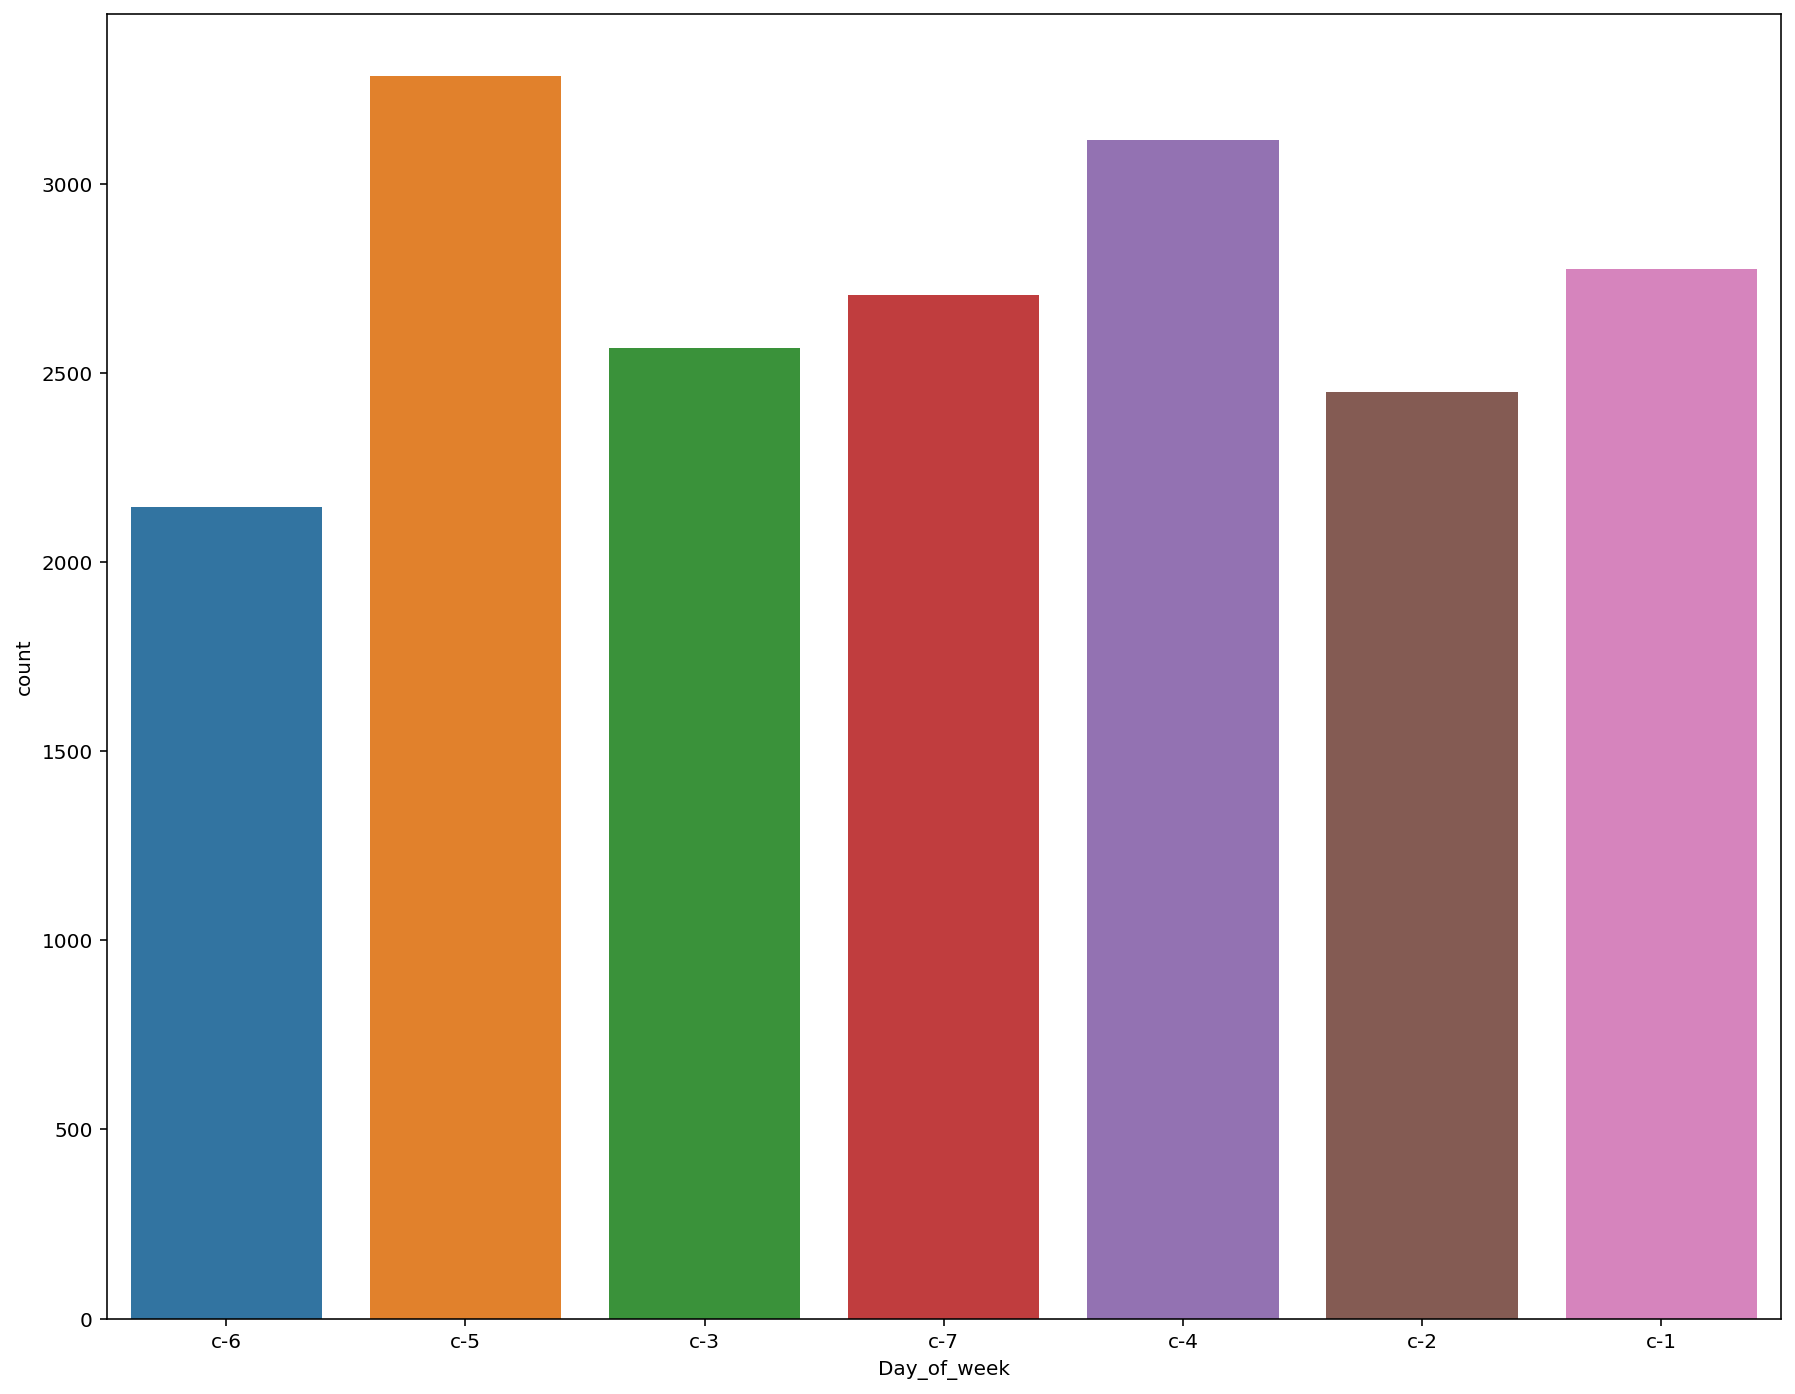

In [14]:
plt.figure(figsize=(15,12))
sns.countplot(x='Day_of_week', data=delayed[delayed['dep_delayed_15min']==1])
plt.show()

Очень интересно, в субботу меньше всего задержек. Но давайте посмотрим долю, а не абсолютные значения

In [15]:
x1 = df['DayOfWeek'].value_counts()

In [16]:
x2 = delayed[delayed['dep_delayed_15min']==1]['Day_of_week'].value_counts()

In [17]:
x2/x1

c-1    0.190404
c-2    0.167831
c-3    0.176937
c-4    0.211523
c-5    0.224125
c-6    0.167199
c-7    0.191885
dtype: float64

Увы, ничего интересного :(